# [NIPA AI - Project 1] 코로나 데이터 분석

## 프로젝트 목표
* 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
* 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차
### 1. 데이터 읽기 
: 코로나 데이터를 불러오고 Dataframe 구조를 확인   
    1.1 데이터 불러오기   
    
### 2. 데이터 정제
: 비어있는 데이터 또느 쓸모없는 데이터를 삭제   
    1.2 비어있는 Column 지우기   

### 3. 데이터 시각화
: 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악   
    3.1 확진일 데이터 전처리하기   
    3.2 월별 확진자 수 출력   
    3.3 8월 일별 확진자 수 출력   
    3.4 지역별 확진자 수 출력   
    3.5 8월달 지역별 확진자 수 출력   
    3.6 월별 관악구 확진자 수 출력   
    3.7 서울 지역에서 확진자를 지도에 출력       

## 1. 데이터 읽기
필요한 패키지 설치 및 import 한 후 pandas를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인한다.

### 1.1 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#pd.read_csv를 통해 dataframe형태로 데이터를 읽어온다.
corona_all = pd.read_csv("data_corona\서울시 코로나19 확진자 현황.csv",encoding='CP949')

In [86]:
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,91856,2021-09-19,NaN,NaN,NaN,금천구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y
1,91855,2021-09-19,NaN,NaN,NaN,송파구,NaN,송파구 소재 실내체육시설 관련(?21.9.),NaN,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y
2,91854,2021-09-19,NaN,NaN,NaN,도봉구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y
3,91853,2021-09-19,NaN,NaN,NaN,강북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y
4,91852,2021-09-19,NaN,NaN,NaN,노원구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y


In [87]:
#dataframe 정보를 요약하여 출력
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91856 entries, 0 to 91855
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      91856 non-null  int64  
 1   확진일     91856 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      91856 non-null  object 
 6   여행력     1681 non-null   object 
 7   접촉력     91856 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      91856 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     91856 non-null  object 
 12  수정일     91856 non-null  object 
 13  노출여부    91856 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 9.8+ MB


## 2. 데이터 정제

2.1 비어있는 column 지우기

In [88]:
corona_del_col = corona_all.drop(columns =['국적','환자정보','조치사항'])

In [89]:
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91856 entries, 0 to 91855
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      91856 non-null  int64  
 1   확진일     91856 non-null  object 
 2   환자번호    0 non-null      float64
 3   지역      91856 non-null  object 
 4   여행력     1681 non-null   object 
 5   접촉력     91856 non-null  object 
 6   상태      91856 non-null  object 
 7   이동경로    0 non-null      float64
 8   등록일     91856 non-null  object 
 9   수정일     91856 non-null  object 
 10  노출여부    91856 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.7+ MB


## 3. 데이터 시각화
데이터 정제를 완료한 corona_del_col 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다,

#### 3.1 확진일 데이터 전처리하기

In [90]:
corona_del_col['확진일']

0        2021-09-19
1        2021-09-19
2        2021-09-19
3        2021-09-19
4        2021-09-19
            ...    
91851    2020-01-31
91852    2020-01-30
91853    2020-01-30
91854    2020-01-30
91855    2020-01-24
Name: 확진일, Length: 91856, dtype: object

확진일 데이터를 month, day 데이터로 나누기

In [91]:
year=[]
month = []
day =[]

for data in corona_del_col['확진일']:
    year.append(data.split('-')[0])
    month.append(data.split('-')[1])
    day.append(data.split('-')[2])

In [92]:
corona_del_col['year']=year
corona_del_col['month']=month
corona_del_col['day']=day

corona_del_col['year'].astype('int64')
corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0        19
1        19
2        19
3        19
4        19
         ..
91851    31
91852    30
91853    30
91854    30
91855    24
Name: day, Length: 91856, dtype: int64

In [93]:
#아래 sns.countplot(~~,order = order)을 지워 굳이 필요가 없으므로,,
order=[]
for i in range(1,13):
    order.append(str(i))
    
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

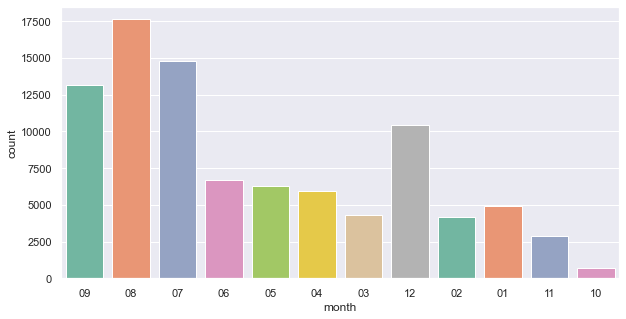

In [94]:
# 그래프의 사이즈를 조절
plt.figure(figsize = (10,5))

#seaborn의 countplot 함수를 사용해 출력
sns.set(style='darkgrid')
ax = sns.countplot (x= "month", data = corona_del_col, palette = "Set2")

위 그래프는 1월달 부터 차례대로 나열된 그래프가 아니라 데이터의 시작인 9월부터의 데이터를 차례로 나열되었다. order을 통해 정리할 수 있지만, 기존 데이터에서 한 자리수의 달들에 0을 붙여 data들을 나열해 넣기가 애매하였다.

흐음 어떻게 하면 바꿀 수 있을지 고민해보아야한다.

<AxesSubplot:>

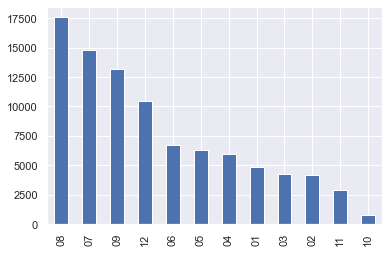

In [95]:
#series의 plot 함수를 사용해 출력
corona_del_col['month'].value_counts().plot(kind = 'bar')

In [96]:
#value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수
corona_del_col['month'].value_counts()

08    17608
07    14785
09    13146
12    10432
06     6717
05     6259
04     5959
01     4885
03     4288
02     4140
11     2904
10      733
Name: month, dtype: int64

음.. 한참하다가 확인한 것인데, 이 데이터는 2020년 1월부터 2021년 9월까지의 데이터이기에 1-9까지 겹치는 달의 데이터는 해를 구분하지 못했다는 것을 알게되었다.
다시 2020, 2021년의 데이터를 나눈 뒤 계속해서 시각화를 해볼 수 있다. 위에서 구분지어놓았고, 연도를 구분한 데이터의 시각화는 아래와 같다.

In [97]:
corona_del_col['year'].value_counts()

2021    72463
2020    19393
Name: year, dtype: int64

In [99]:
corona_del_col = corona_del_col[corona_del_col['year']=='2021']

In [100]:
corona_del_col['year'].value_counts()

2021    72463
Name: year, dtype: int64

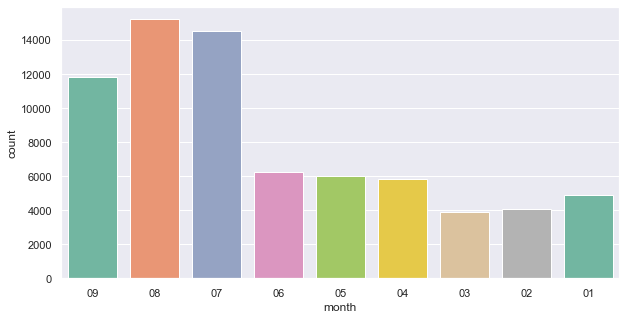

In [103]:
# 그래프의 사이즈를 조절
plt.figure(figsize = (10,5))

#seaborn의 countplot 함수를 사용해 출력
sns.set(style='darkgrid')
ax = sns.countplot (x= "month", data = corona_del_col, palette = "Set2")

### 2021년 8월 확진자 수 출력

2021년에도 8월달의 확진자 수가 가장 많은 것을 확인할 수 있었다.
이번엔 8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해보면,

In [113]:
"""
order2=[]
for i in range(1,32):
    order2.append(str(i))
"""
#.. order은 아래와 같이 한다..
order2 = ['01','02','03','04','05','06','07','08','09']
for i in range(10,32):
    order2.append(str(i))
    
order2

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

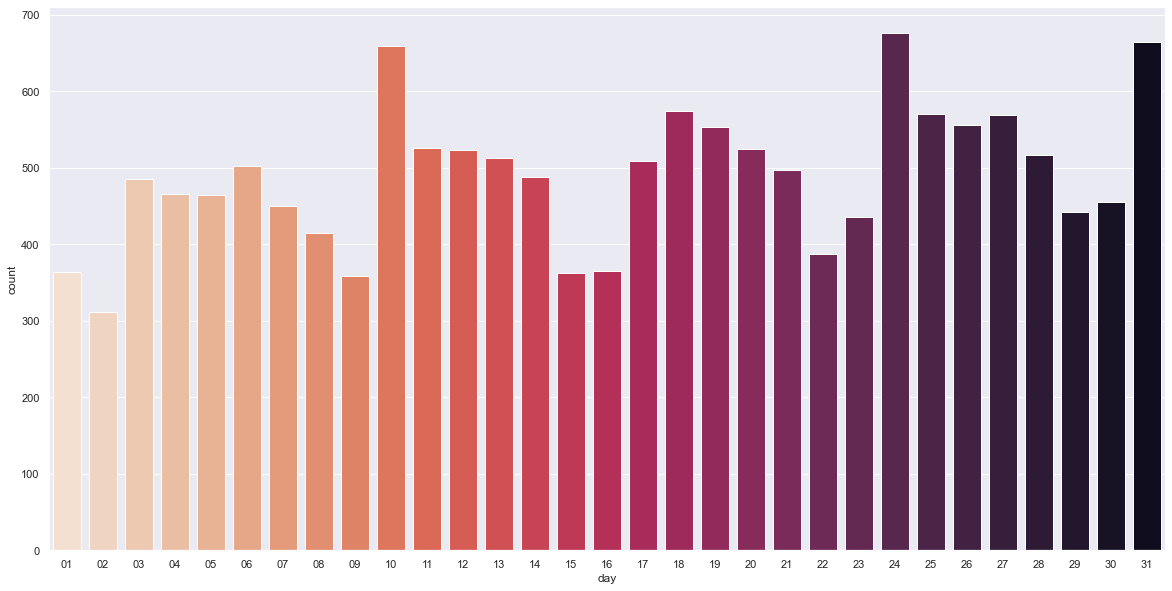

In [114]:
plt.figure(figsize = (20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data = corona_del_col[corona_del_col['month']=='08'], palette='rocket_r', order = order2)

#### 8월 평균 일별 확진자 수를 구하면

In [122]:
corona_del_col[corona_del_col['month']=='08']['day'].count()/31

490.0967741935484

In [123]:
corona_del_col[corona_del_col['month']=='08']['day'].value_counts().mean()

490.0967741935484

In [124]:
quiz_1 = float(corona_del_col[corona_del_col['month']=='08']['day'].value_counts().mean())

### 지역별 확진자 수 출력

In [126]:
corona_del_col['지역']

0        금천구
1        송파구
2        도봉구
3        강북구
4        노원구
        ... 
72498    관악구
72499    동작구
72500    금천구
72501    동작구
72502    성동구
Name: 지역, Length: 72463, dtype: object

In [143]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'cmb10',
 'cmsy10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmss10',
 'cmex10',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmr10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'cmtt10',
 'DejaVu Serif',
 'High Tower Text',
 'Eras Light ITC',
 'HCR Batang',
 'Verdana',
 'Cooper Black',
 'MDSol',
 'Constantia',
 'Gill Sans MT Ext Condensed Bold',
 'Lucida Fax',
 'Liberty BT',
 'Yj GABI',
 'Century Schoolbook',
 'HYHeadLine-Medium',
 'CentSchbook BT',
 'Bodoni MT',
 'Arial',
 '??????',
 'GoudyOlSt BT',
 'DomCasual BT',
 'KoPubBatang Medium',


In [144]:
plt.rcParams['font.family']= 'NanumSquare'

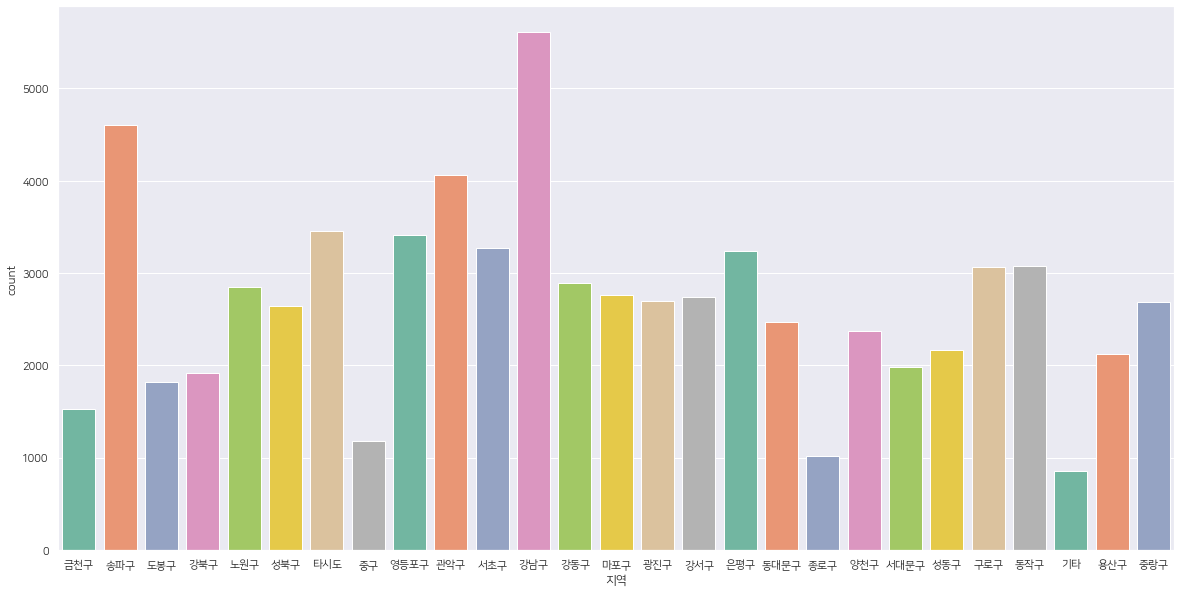

In [145]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumSquare", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_del_col, palette="Set2")

### 8월달 지역별 확진자 수 출력

In [148]:
corona_out_region = corona_del_col.replace({'타시도':'기타'})

In [149]:
corona_out_region[corona_del_col['month'] == '08']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,year,month,day
11840,80016,2021-08-31,NaN,강동구,NaN,기타 확진자 접촉,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,31
11841,80015,2021-08-31,NaN,강동구,NaN,기타 확진자 접촉,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,31
11842,80014,2021-08-31,NaN,강동구,NaN,기타 확진자 접촉,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,31
11843,80013,2021-08-31,NaN,강남구,NaN,감염경로 조사중,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,31
11844,80012,2021-08-31,NaN,강남구,NaN,기타 확진자 접촉,-,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,64828,2021-08-01,NaN,마포구,NaN,감염경로 조사중,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,01
27029,64827,2021-08-01,NaN,마포구,NaN,감염경로 조사중,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,01
27030,64826,2021-08-01,NaN,마포구,NaN,마포구 소재 음식점 관련(?21.7.(2)),퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,01
27031,64825,2021-08-01,NaN,용산구,NaN,기타 확진자 접촉,퇴원,NaN,2021-09-20 9:29,2021-09-20 9:29,Y,2021,08,01


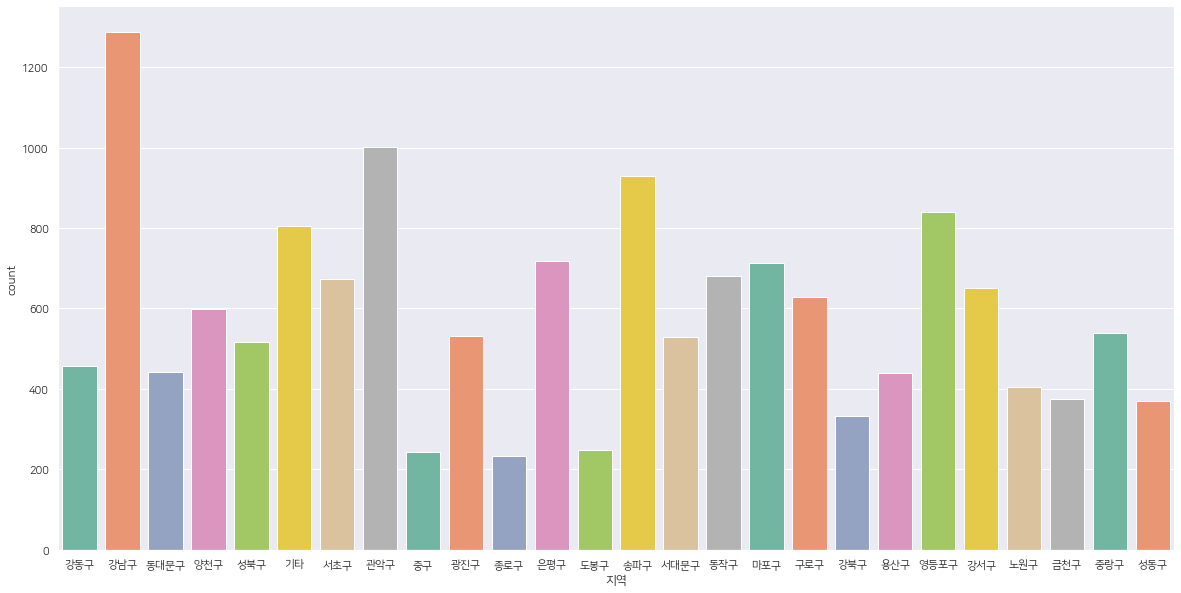

In [152]:
plt.figure(figsize = (20,10))
sns.set(font="NanumSquare", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_del_col['month']=='08'], palette="Set2")

### 월별 동작구 확진자 수 출력

In [153]:
order=['01','02','03','04','05','06','07','08','09']
#2021년 10월 이후의 자료는 존재하지 않기에!

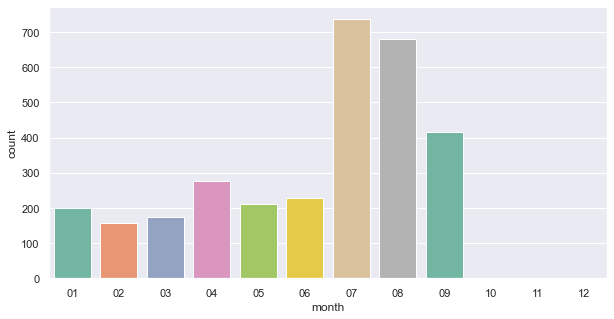

In [155]:
corona_out_region['month'][corona_out_region['지역'] == '동작구']
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
ax = sns.countplot(x="month", data = corona_out_region[corona_out_region['지역']=='동작구'],palette='Set2', order = order
        )

### 서울 지역에서 확진자를 지도에 출력
folium 사용

In [156]:
import folium

In [157]:
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요.   
해결을 위해 서울시 행정구혁 시군 정보데이터를 불러와 사용한다.   
데이터 출처 : https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [161]:
CRS = pd.read_csv("data_corona\서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [162]:
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [165]:
CRS[CRS['시군구명_한글']=='동작구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307


for문 사용해 지역마다 확진자를 원형 마커를 사용해 지도에 출력

In [168]:
#타시도 -> 기타로 바꾼 데이터를 삭제해 데이터 처리한다
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

#중구를 가운데 좌표로 잡고 지도를 출력한다.
map_osm=folium.Map(location =[37.557945, 126.99419], zoom_start=11)

for region in set(corona_seoul['지역']):
    
    count = len(corona_seoul[corona_seoul['지역']==region])
    
    CRS_region = CRS[CRS['시군구명_한글']==region]
    
    marker = folium.CircleMarker([CRS_region['위도'],CRS_region['경도']],#위치
                                 radius = count/100 +10, #범위
                                 color = '#3186cc', #선 색상
                                 fill_color = '#3186cc', #면 색상
                                 popup=' '.join((region,str(count),'명')))   #팝업 설정
    marker.add_to(map_osm)
    
map_osm

2021년 확진자 수가 너무 많이 나와서 마커의 범위를 많이 줄여주었다..

# 끝!